In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
from optionsdata import OptionsData
from blackScholes import implied_volatility, black_scholes_call, black_scholes_put
from callOption import CallOption
from putOption import PutOption
from optionGreekPlotter import OptionGreekPlotter

# Call and Put pricing

In [15]:
Ticker ="AAPL"

In [16]:
options = OptionsData(Ticker, extract_date = "01/10/2025")
options.load_data()
options.process_data(interest_rate=0.042)

Data loaded successfully!


/home/onyxia/work/optionsdata.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data['implied_volatility'] = call_data.apply(lambda row: implied_volatility(
/home/onyxia/work/optionsdata.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  put_data['implied_volatility'] = put_data.apply(lambda row: implied_volatility(


In [17]:
options_df_filtered = options.implied_volatility

In [18]:
options_df_filtered.describe()

,strike,maturity,lastPrice,volume,implied_volatility
count,662.000000,662.000000,662.000000,662.000000,625.000000
mean,206.385952,0.601701,20.083233,295.555891,0.427853
std,82.360547,0.610276,39.868406,1268.502512,0.455983
min,5.000000,0.019178,0.010000,10.000000,0.143545
25%,160.000000,0.100685,0.350000,19.250000,0.232549
50%,215.000000,0.441096,2.850000,42.500000,0.271511
75%,260.000000,0.939726,18.087500,149.500000,0.404618
max,450.000000,2.013699,249.300000,17840.000000,4.661733


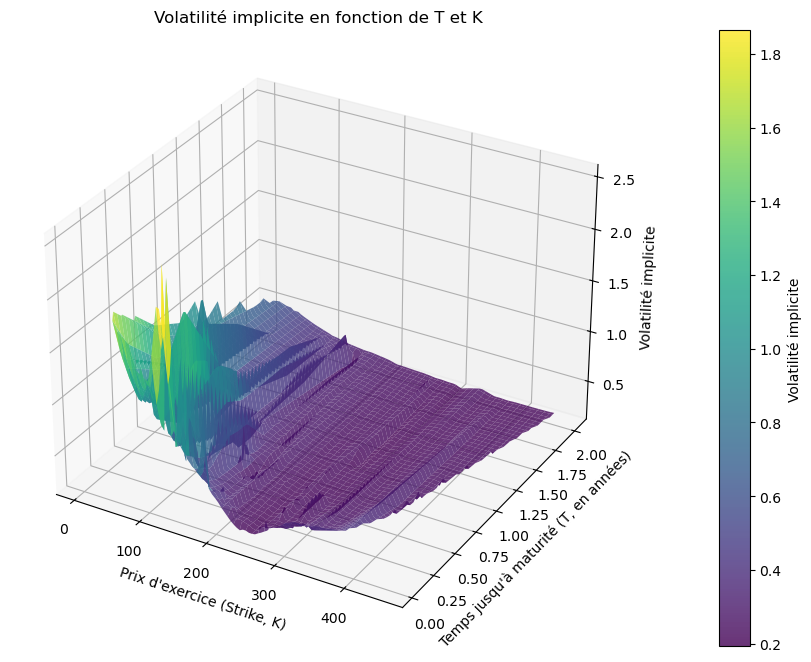

In [19]:
options.implied_volatility_plot()

In [8]:
sigma, stock = options.sigma_sim(T=1.5, K=100)
interest_rate = 0.042
call_option = CallOption(10, 2, stock, interest_rate, sigma)
put_option = PutOption(10, 2, stock, interest_rate, sigma)
call_option.rho()
put_option.rho()

np.float64(-2.1776120215996858e-06)

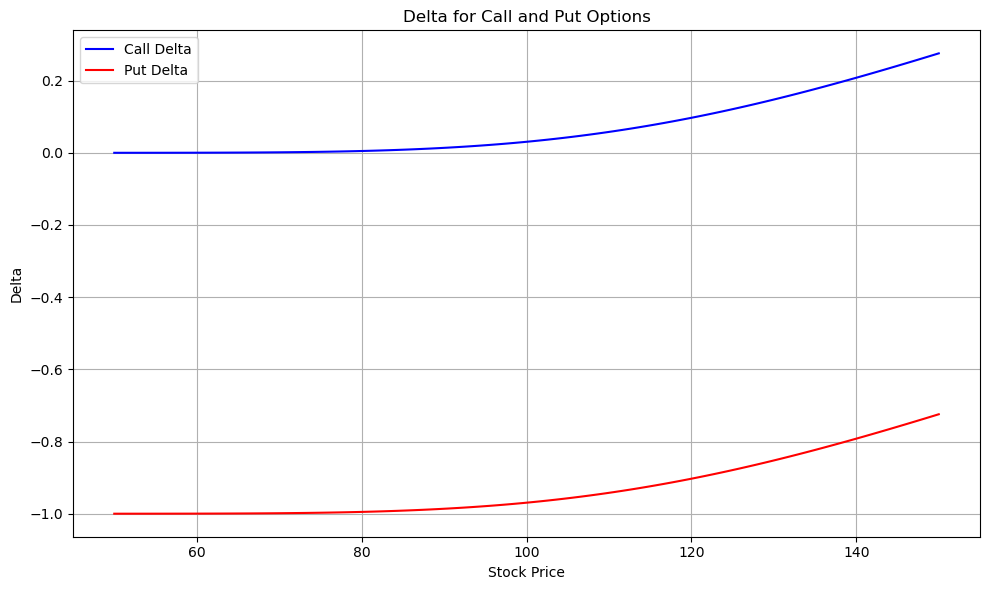

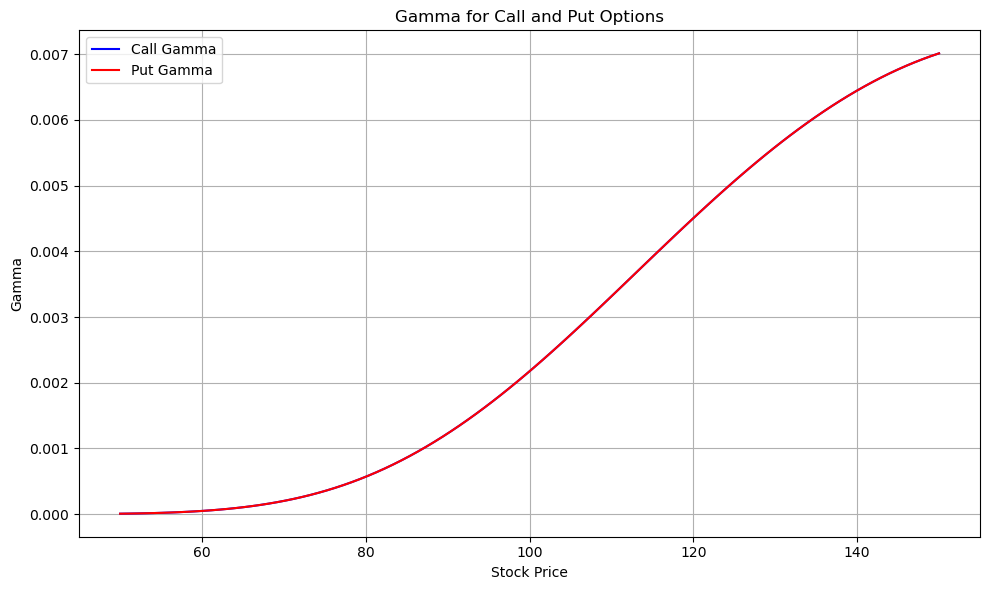

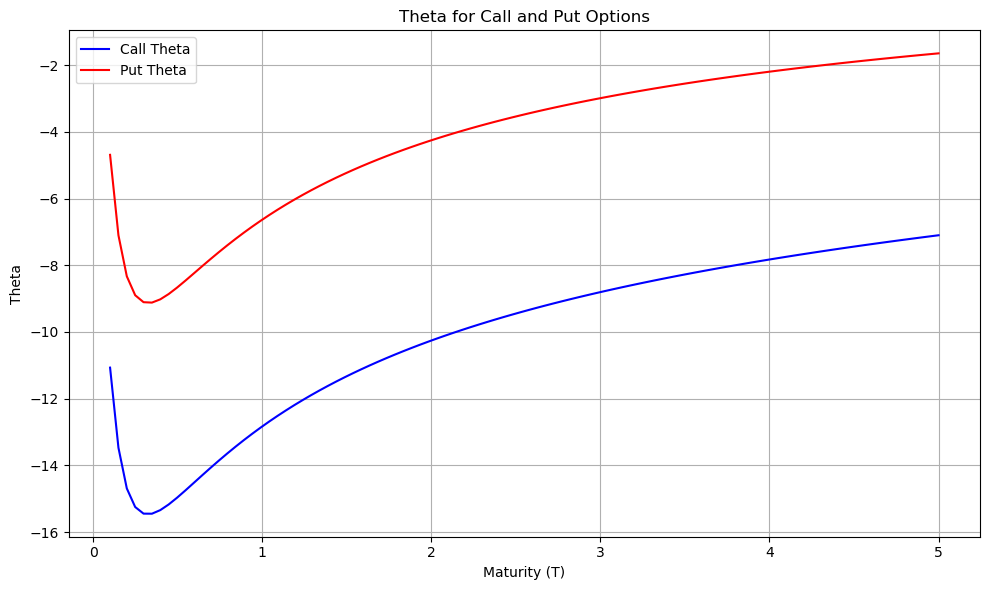

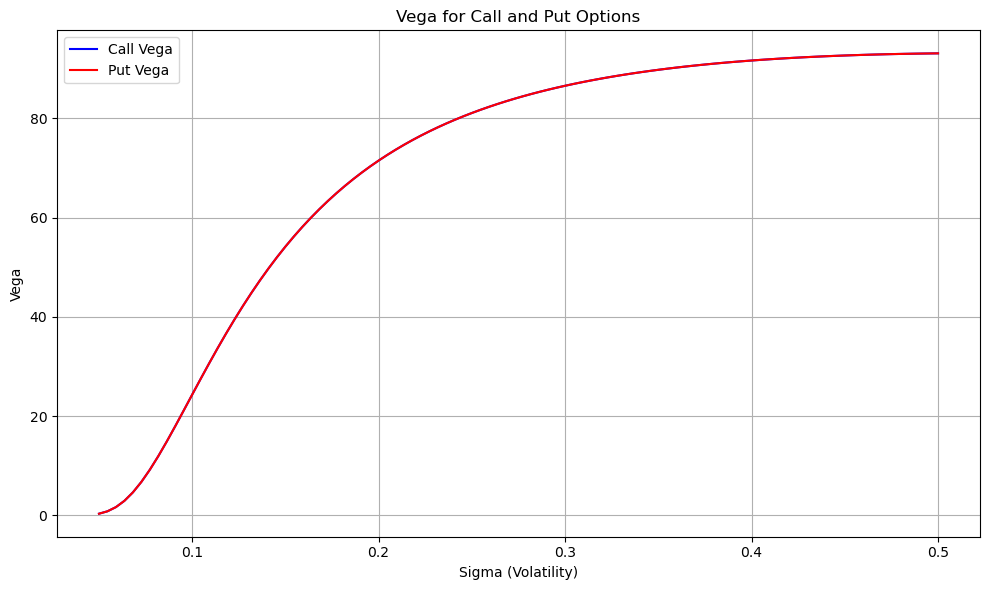

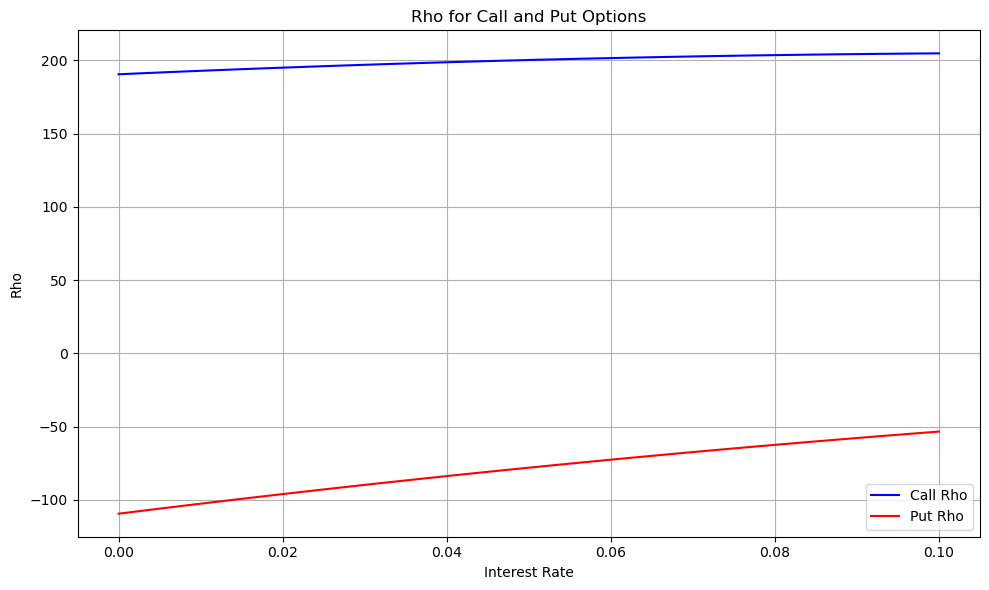

In [9]:
# Example of usage
if __name__ == "__main__":
    # Define option parameters
    K = 200
    T = 1.5
    sigma, stock = options.sigma_sim(T, K)
    interest_rate = 0.032

    # Create the plotter instance
    plotter = OptionGreekPlotter(K, T, stock, sigma, interest_rate)

    # Functions for each Greek
    def delta(option):
        return option.delta()

    def gamma(option):
        return option.gamma()

    def theta(option):
        return option.theta()

    def vega(option):
        return option.vega()

    def rho(option):
        return option.rho()

    # Plot Delta vs Stock Prices
    stock_prices = np.linspace(50, 150, 100)
    plotter.plot_greek(delta, stock_prices, "Stock Price", "Delta", "Delta for Call and Put Options")

    # Plot Gamma vs Stock Prices
    plotter.plot_greek(gamma, stock_prices, "Stock Price", "Gamma", "Gamma for Call and Put Options")

    # Plot Theta vs Maturities
    maturities = np.linspace(0.1, 5, 100)
    plotter.plot_greek(theta, maturities, "Maturity (T)", "Theta", "Theta for Call and Put Options")

    # Plot Vega vs Volatility
    volatilities = np.linspace(0.05, 0.5, 100)
    plotter.plot_greek(vega, volatilities, "Sigma (Volatility)", "Vega", "Vega for Call and Put Options")

    # Plot Rho vs Interest Rates
    interest_rates = np.linspace(0.0, 0.1, 100)
    plotter.plot_greek(rho, interest_rates, "Interest Rate", "Rho", "Rho for Call and Put Options")

# US Bond Pricing

In [1]:
#pip install fredapi
#pip install nelson_siegel_svensson
#pip install datetime

In [1]:
from usBond import*
import datetime

In [2]:
api_key = '99b15e0a2f3b3f4571893e831fd555d0'
start = "2023-01-01"
end = datetime.date.today()
today = "2025-01-09" #datetime.date.today()

bond = UsBond()
bond.get_yield_data(start, end, api_key)

In [9]:
bond.get_price(face_value = 1000, coupon_rate = 0.0, years_to_maturity = 1/365, date = today, frequency=1)

np.float64(183.9398669251163)

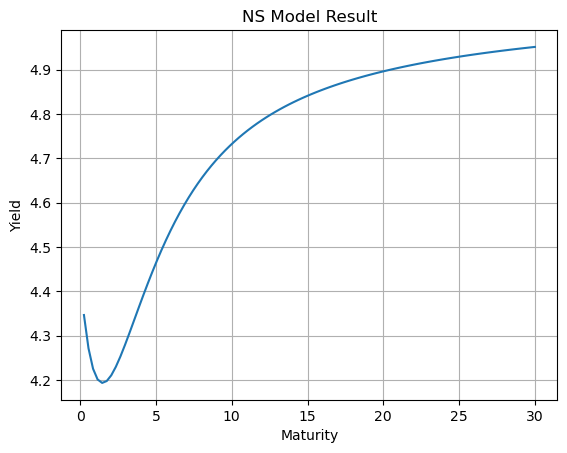

In [4]:
bond.NS_yield_curve_plot()